For this demo, we will use the **The MNIST database of handwritten digits** from LeCun, Cortes, and Burges. The data set is available at http://yann.lecun.com/exdb/mnist/. It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. The MNIST database was constructed from NIST's Special Database 3 (collected from Census Bureau employees) and Special Database 1 (collected from high-school students) which contain binary images of handwritten digits. In total there are 250 writers. However, training and test sets have different writers. An accuracy of 99.77% is achieved by Ciresan et al. CVPR 2012 using convolutional neural networks.

We will now try some basic neural network architectures and test them on cross-validation data.

#Allow Drive Access

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Import Dependencies

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#Load Data

In [3]:
path = '/content/drive/My Drive/Assign2/'
file = 'mnist_train.csv'
df = pd.read_csv(path+file)

## Take a look at Data

In [ ]:
df.head()

In [ ]:
df.describe()

In [4]:
#Choosing Features: Intensity at each pixel
X, y = df.iloc[:, 1:].values, df['label'].values
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [5]:
print(X.shape)
print(y.shape)
print(y[0])

(60000, 784)
(60000,)
5


## Print some numbers

5


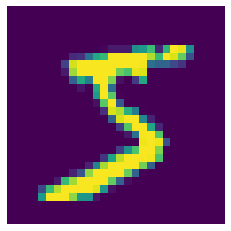

0


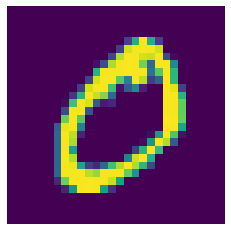

4


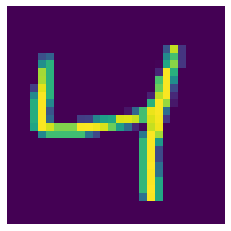

1


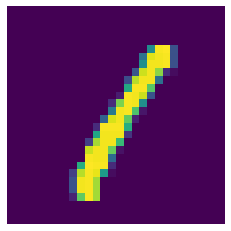

9


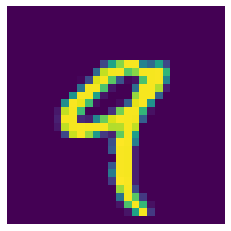

2


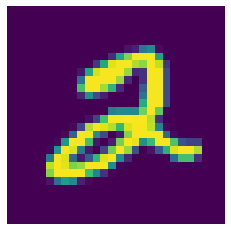

1


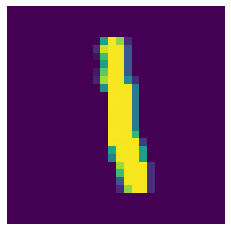

3


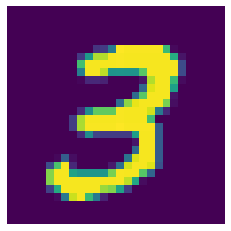

1


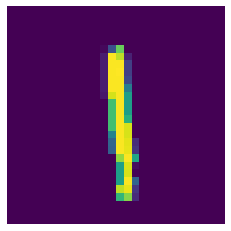

4


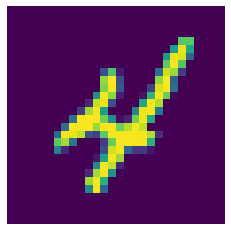

In [6]:
for i in range(0, 10):
  print(y[i])
  some_digit = X[i]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image)#, cmap="binary")
  plt.axis("off")
  plt.show()

## One-hot encoding

In [7]:
num_classes = 10
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [8]:
print(y.shape)
print(y[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Data Preprocessing

In [9]:
#Feature Scaling
X_scale = X/255

# First model

### Defining the Model

In [10]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match the shape of our training data
model.add(Dense(units=32, activation='sigmoid', input_shape=(X_scale.shape[1],)))
model.add(Dense(units=num_classes, activation='softmax'))

#The total number of parameters should be 785*32 going from input to hidden layer 1 (784 input features + bias unit)*(32 neurons in hidden layer 1)
#The total number of parameters should be 33*10 going from input to hidden layer 1 (32 neurons in hidden layer + bias unit)*(10 output neurons)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Training the model

Training Time:  23.778779983520508


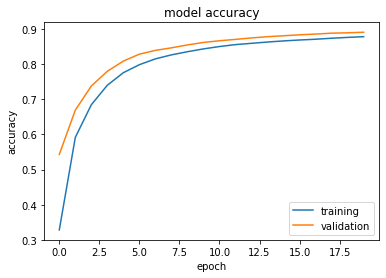

Validation loss: 0.488
Validation accuracy: 0.882


In [11]:
t0 = time.time()

#What if we increase the number of iterations?
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_scale, y, batch_size=128, epochs=20, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_scale, y, verbose=False)

t1 = time.time()

print('Training Time: ', t1 - t0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

In [12]:
#Obtaining prediction probabilities for each class:
y_pred = model.predict(X_scale)
print(y_pred[0])

#Alternatively, we can assign one-hot encoding
y_pred = (y_pred > 0.5)
print(y_pred[0])

#To obtain predicted number, we choose the index that has the highest value
print(y_pred[0].argmax(axis=0))

[0.07457343 0.00316329 0.02122192 0.5333792  0.00057523 0.28315577
 0.00919462 0.05266777 0.01283382 0.00923496]
[False False False  True False False False False False False]
3


# Examining Coefficients and what the model learns

(784, 32)
(784,)


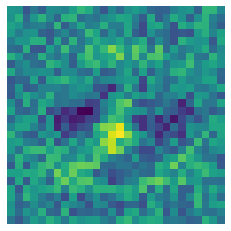

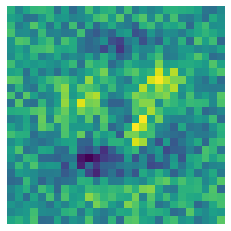

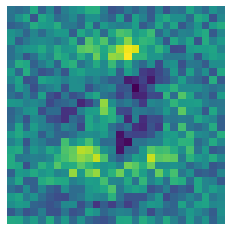

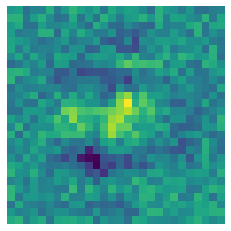

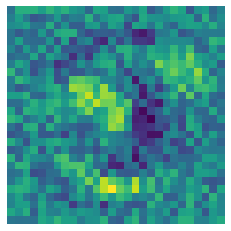

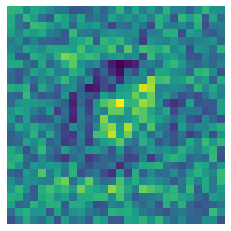

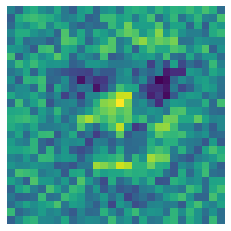

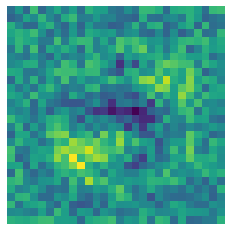

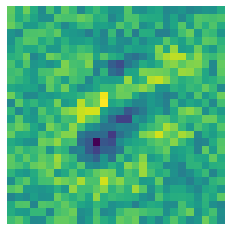

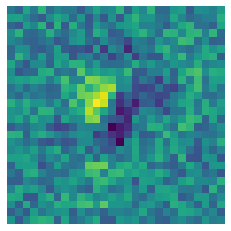

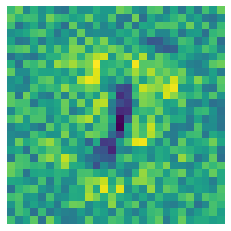

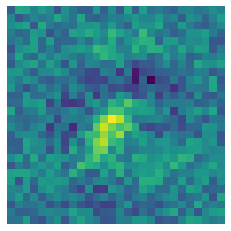

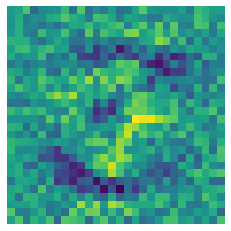

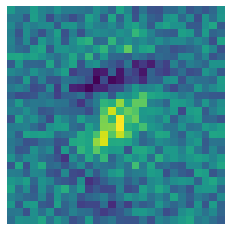

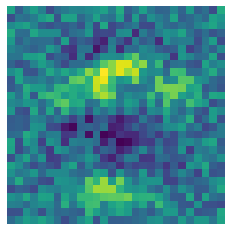

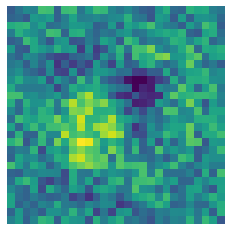

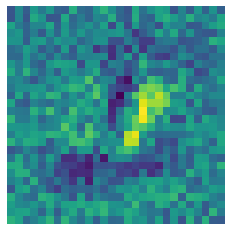

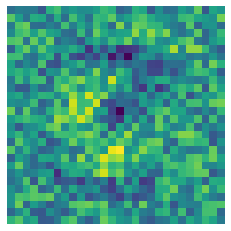

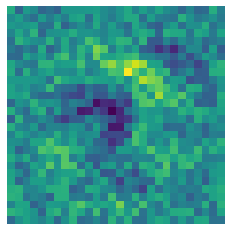

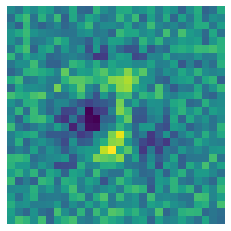

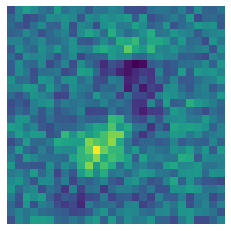

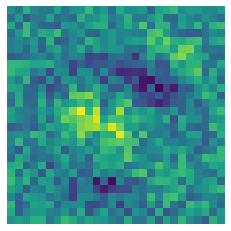

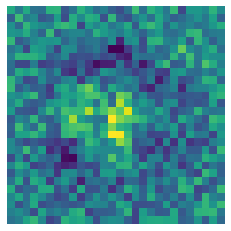

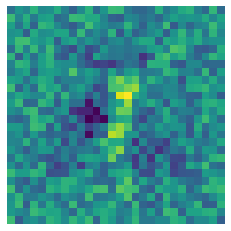

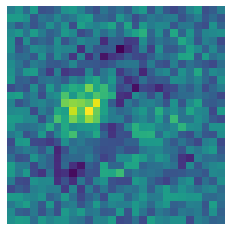

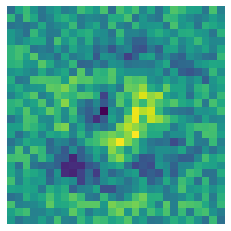

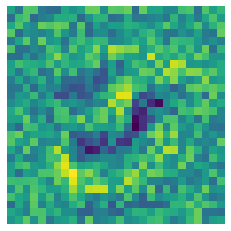

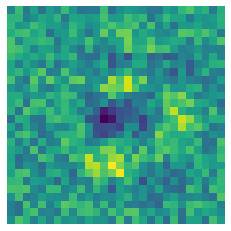

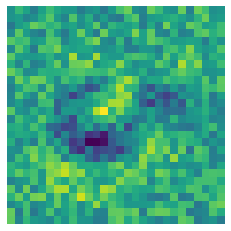

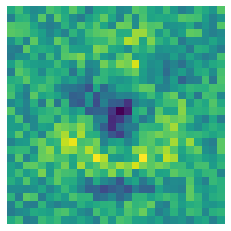

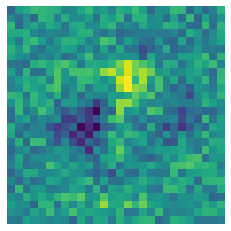

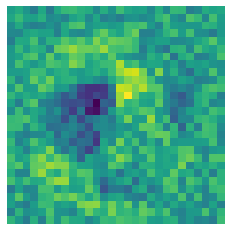

In [13]:
#Getting weights for hidden layer 1:
weights = model.layers[0].get_weights()[0]
print(weights.shape)

#Shape of neuron 1 weights in hidden layer 1
neuron = weights[:,0]
print(neuron.shape)


#Getting weights for ith Neuron in hidden layer (i ranges from 0 to 32 in this case, given the architecture)
for i in range(0, 32):
  neuron = weights[:,i]
  some_digit_image = neuron.reshape(28, 28)
  plt.imshow(some_digit_image)
  plt.axis("off")
  plt.show()

#As you can see, what layer 1 learns is a bit more abstract than we expected

#Second model (Adding more hidden layers)

In [14]:
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(X_scale.shape[1],)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))

#how many parameters should we have in each layer?

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Training Time:  19.070186614990234


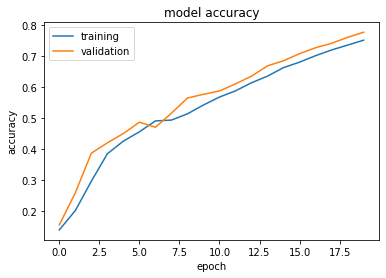

Validation loss: 1.0
Validation accuracy: 0.762


In [15]:
t0 = time.time()

#Adding additional layers increases training time
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

#We can increase the number of epochs here for convergence
history = model.fit(X_scale, y, batch_size=128, epochs=20, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_scale, y, verbose=False)

t1 = time.time()

print('Training Time: ', t1 - t0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

# Third Model (adding more neurons in a hidden layer)

In [16]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match the shape of our training data
model.add(Dense(units=1024, activation='sigmoid', input_shape=(X_scale.shape[1],)))
model.add(Dense(units=num_classes, activation='softmax'))

#how many parameters should we have in each layer?
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


Training Time:  80.13481426239014


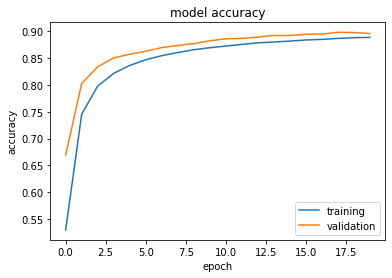

Validation loss: 0.396
Validation accuracy: 0.889


In [17]:
t0 = time.time()

#Adding more neurons also increases training time
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_scale, y, batch_size=128, epochs=20, verbose=False, validation_split=.2)
loss, accuracy  = model.evaluate(X_scale, y, verbose=False)

t1 = time.time()

print('Training Time: ', t1 - t0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

# Obtaining Predictions and Evaluation on Test Set

In [18]:
file = 'mnist_test.csv'
df = pd.read_csv(path+file)
X_test, y_test = df.iloc[:, 1:].values, df['label']
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
X_test = X_test/255

y_test_pred = model.predict(X_test)

loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

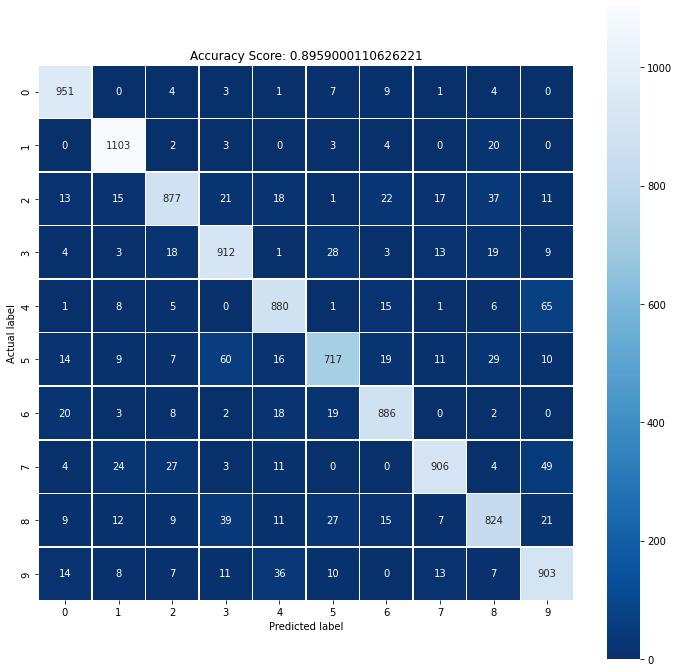

In [19]:
#Confusion Matrix using seaborn
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)), annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title);

In [20]:
#Evaluation Metrics
print(classification_report(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.93      0.97      0.95      1135
           2       0.91      0.85      0.88      1032
           3       0.87      0.90      0.88      1010
           4       0.89      0.90      0.89       982
           5       0.88      0.80      0.84       892
           6       0.91      0.92      0.92       958
           7       0.93      0.88      0.91      1028
           8       0.87      0.85      0.86       974
           9       0.85      0.89      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000
